# Step1:Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

# Step2:Load and Inspect the Dataset

In [4]:
#Load the dataset
data = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')

In [5]:
#Explore number of Rows and columns
data.shape

(307645, 9)

In [6]:
#Explore the Dataset
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [8]:
#View number of null values present
data.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

# Step3:Data Preprocessing

In [9]:
# Drop rows with missing values
data.dropna(inplace=True)

In [10]:
# Show number of rows and columns
data.shape

(307477, 9)

In [11]:
#View the statistical summary of numerical variables
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307477 non-null  int64  
 1   MONTH             307477 non-null  int64  
 2   SUPPLIER          307477 non-null  object 
 3   ITEM CODE         307477 non-null  object 
 4   ITEM DESCRIPTION  307477 non-null  object 
 5   ITEM TYPE         307477 non-null  object 
 6   RETAIL SALES      307477 non-null  float64
 7   RETAIL TRANSFERS  307477 non-null  float64
 8   WAREHOUSE SALES   307477 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


# Step4:Exploring the Unique values

In [13]:
# View the labels in the variable
data['SUPPLIER'].unique()

array(['REPUBLIC NATIONAL DISTRIBUTING CO', 'PWSWN INC',
       'RELIABLE CHURCHILL LLLP', 'LANTERNA DISTRIBUTORS INC',
       'DIONYSOS IMPORTS INC', 'KYSELA PERE ET FILS LTD',
       'SANTA MARGHERITA USA INC', 'BROWN-FORMAN BEVERAGES WORLDWIDE',
       'JIM BEAM BRANDS CO', 'INTERNATIONAL CELLARS LLC',
       'HEAVEN HILL DISTILLERIES INC', 'BACCHUS IMPORTERS LTD',
       'MONSIEUR TOUTON SELECTION',
       'THE COUNTRY VINTNER, LLC DBA WINEBOW', 'ROYAL WINE CORP',
       'STE MICHELLE WINE ESTATES', 'Default', 'SAZERAC CO',
       'SALVETO IMPORTS LLC', 'HUB WINE CORPORATION',
       'ALLAGASH BREWING COMPANY', 'CAMPARI AMERICA LLC',
       'PERNOD RICARD USA LLC', 'PRESTIGE BEVERAGE GROUP OF MD LLC',
       'BACARDI USA INC', 'YOUNG WON TRADING INC',
       'TROEGS BREWING COMPANY', 'CASTLE BRANDS USA CORP', 'LEGENDS LTD',
       'WASHBURN WINE CO', 'CELICAR LLC DBA TWIN VALLEY DISTILLERS',
       'DOPS INC', 'JACKSON FAMILY ENTERPRISES INC',
       'BUCK DISTRIBUTING COMPANY INC'

In [14]:
# view how many different types of variables are there
len(data['SUPPLIER'].unique())

396

In [15]:
#Explore ITEM CODE variable and View the labels in the variable
data['ITEM CODE'].unique()

array(['100009', '100024', '1001', ..., '47502', '69879', '11203'],
      dtype=object)

In [16]:
# view how many different types of variables are there
len(data['ITEM CODE'].unique())

34039

In [17]:
#Explore ITEM DESCRIPTION variable
#View the labels in the variable
data['ITEM DESCRIPTION'].unique()

array(['BOOTLEG RED - 750ML', 'MOMENT DE PLAISIR - 750ML',
       'S SMITH ORGANIC PEAR CIDER - 18.7OZ', ...,
       'FIORE MARYLAND MER - 750ML', 'DELIRIUM NOEL GIFT PACK 750ML',
       'BENEDIKTINER HELLES LAGER - 50L'], dtype=object)

In [18]:
# view how many different types of variables are there
len(data['ITEM DESCRIPTION'].unique())

34805

In [19]:
#Explore ITEM TYPE variable
#View the labels in the variable
data['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF',
       'NON-ALCOHOL', 'DUNNAGE'], dtype=object)

In [20]:
# view how many different types of variables are there
len(data['ITEM TYPE'].unique())

8

# Step5:Exploratory Data Analysis

1:SCALING THE FEATURES

In [28]:
# Grouping data to get sales patterns for each product
product_sales = data.groupby(['ITEM DESCRIPTION', 'ITEM TYPE'])[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum().reset_index()

In [73]:
numeric_features = data[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']]

In [59]:
# Select numeric features for clustering
numeric_features = product_sales[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']]

In [60]:
# Standardize the data
scaler = StandardScaler()
product_sales_scaled = scaler.fit_transform(numeric_features)

2:HISTOGRAMS

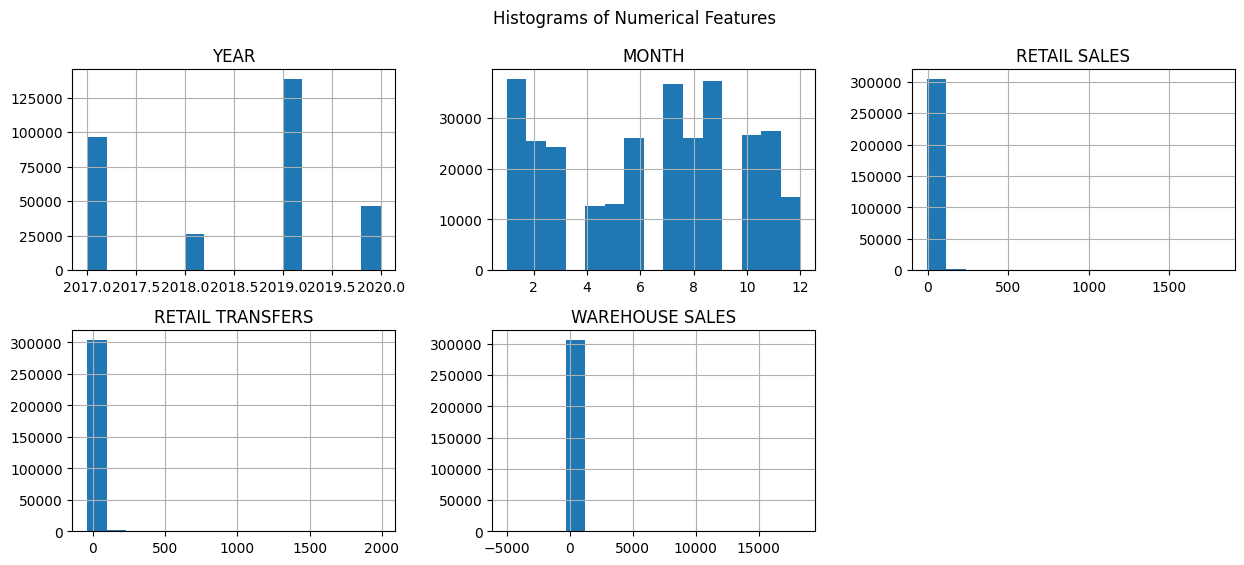

In [31]:
# Plot histograms for numerical features
numeric_features = data.select_dtypes(include=['int64','float64']).columns
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

3:ITEM TYPE SALES

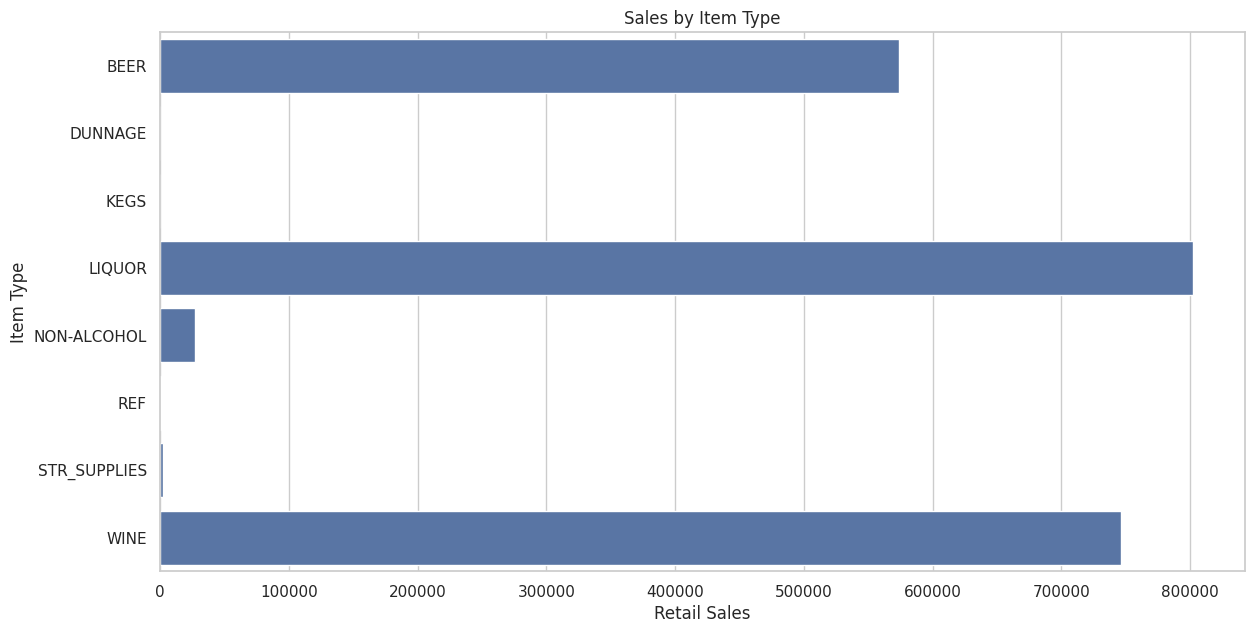

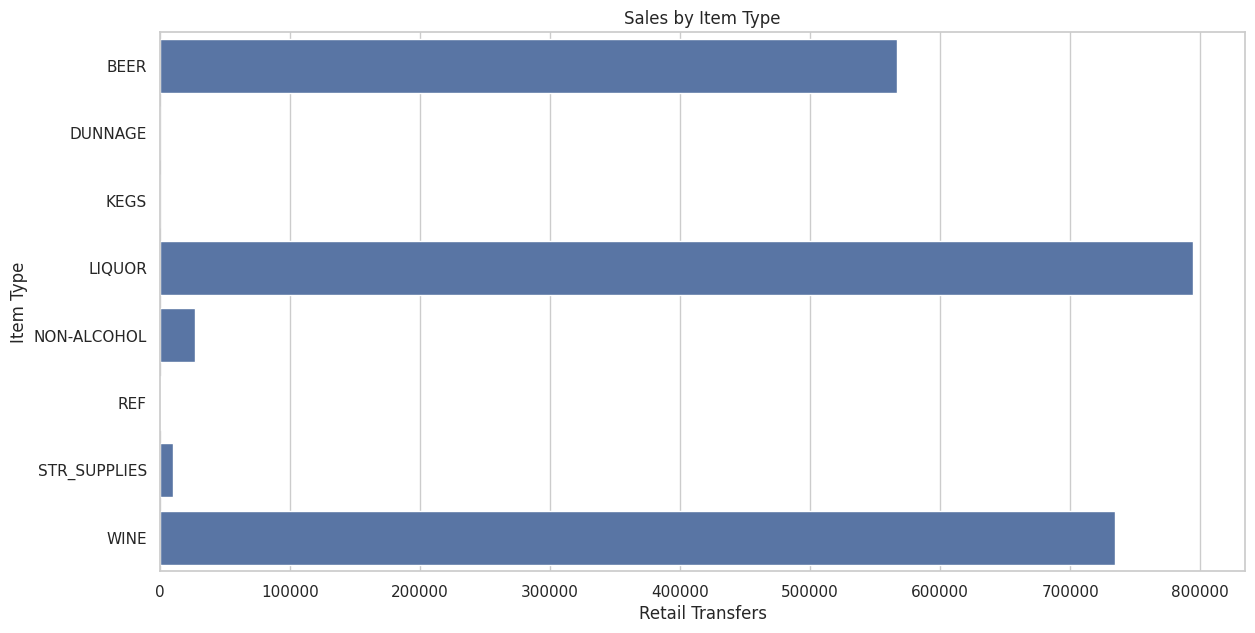

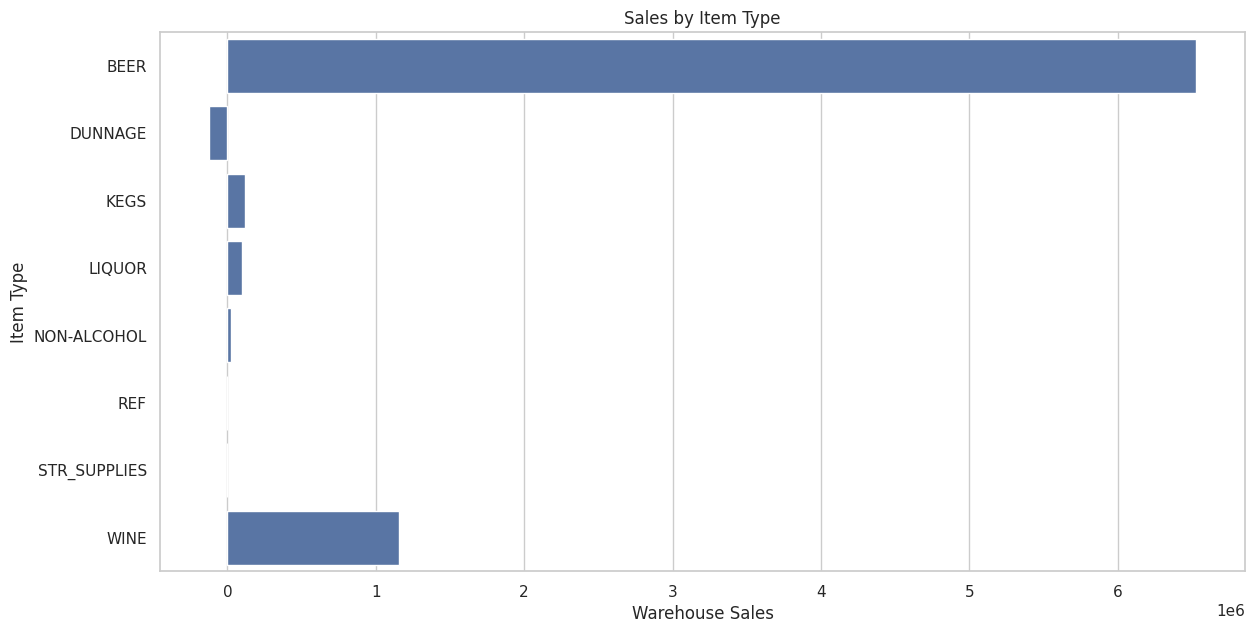

In [53]:
item_type_sales = data.groupby('ITEM TYPE')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL SALES', y='ITEM TYPE', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Retail Sales')
plt.ylabel('Item Type')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL TRANSFERS', y='ITEM TYPE', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Retail Transfers')
plt.ylabel('Item Type')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='WAREHOUSE SALES', y='ITEM TYPE', data=item_type_sales)
plt.title('Sales by Item Type')
plt.xlabel('Warehouse Sales')
plt.ylabel('Item Type')
plt.show()

4:SUPPLIER SALES

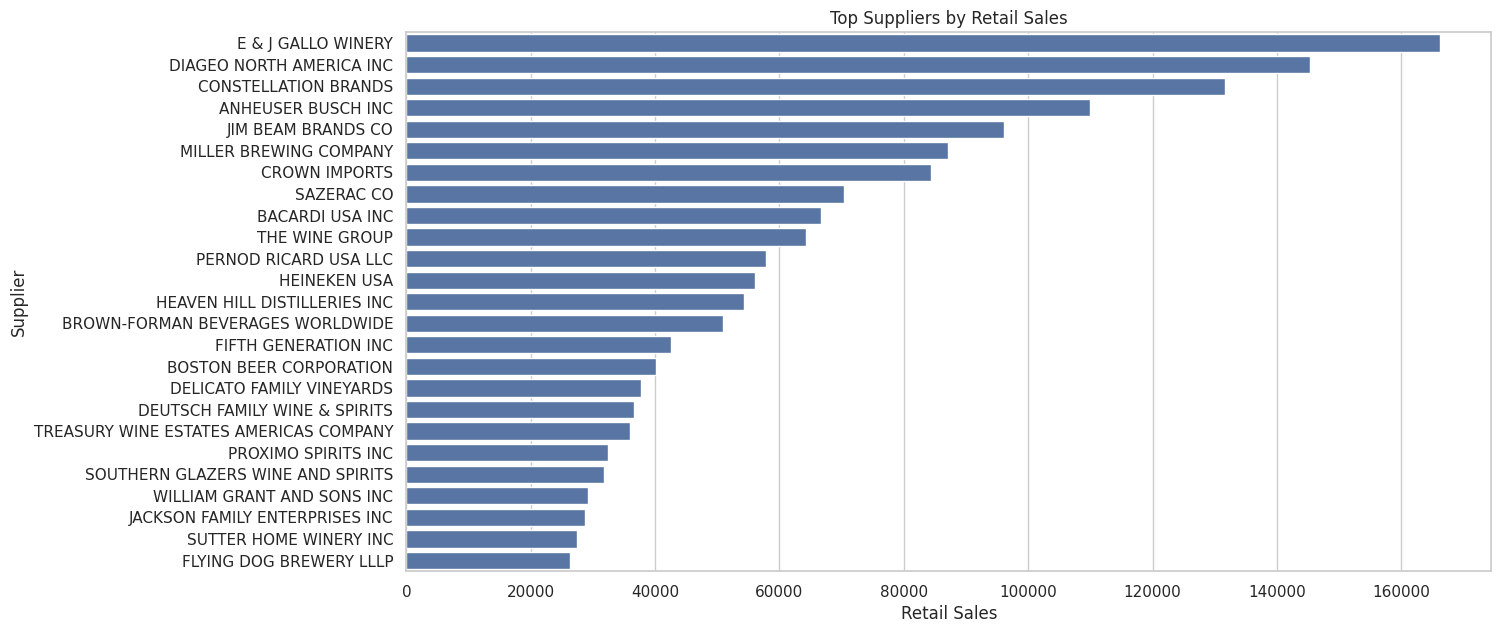

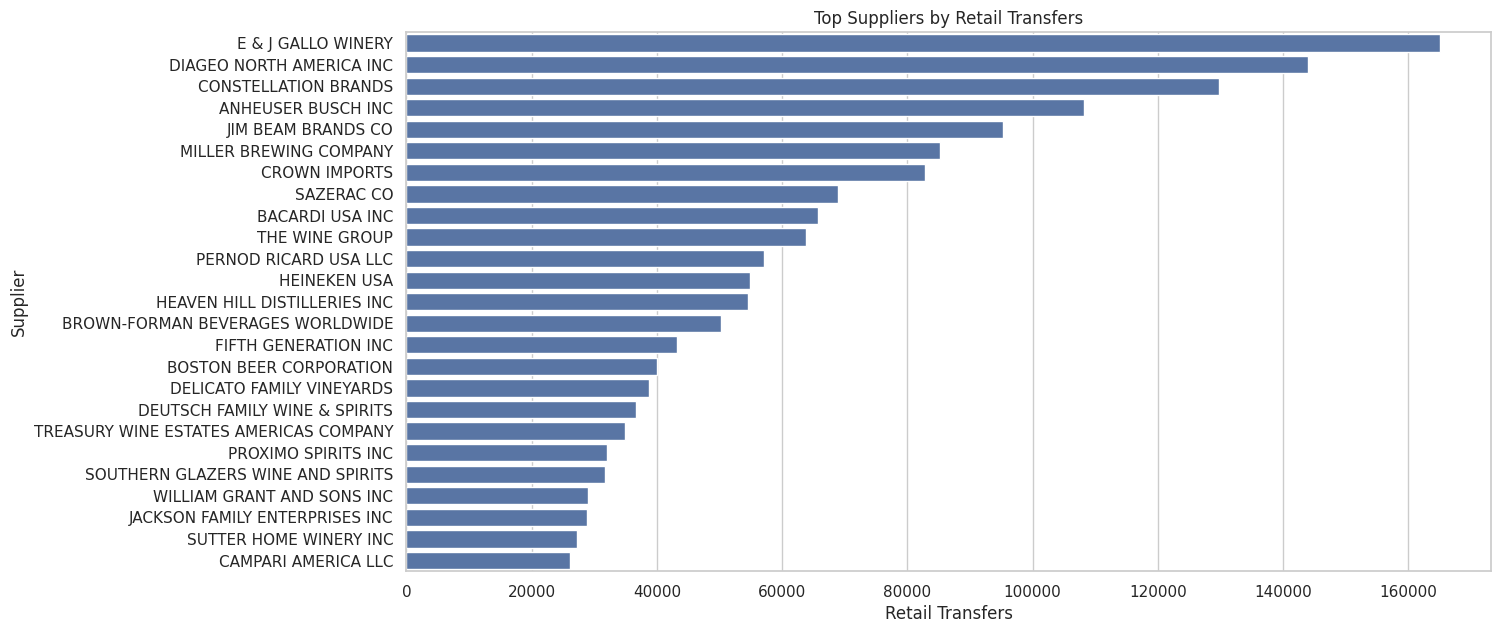

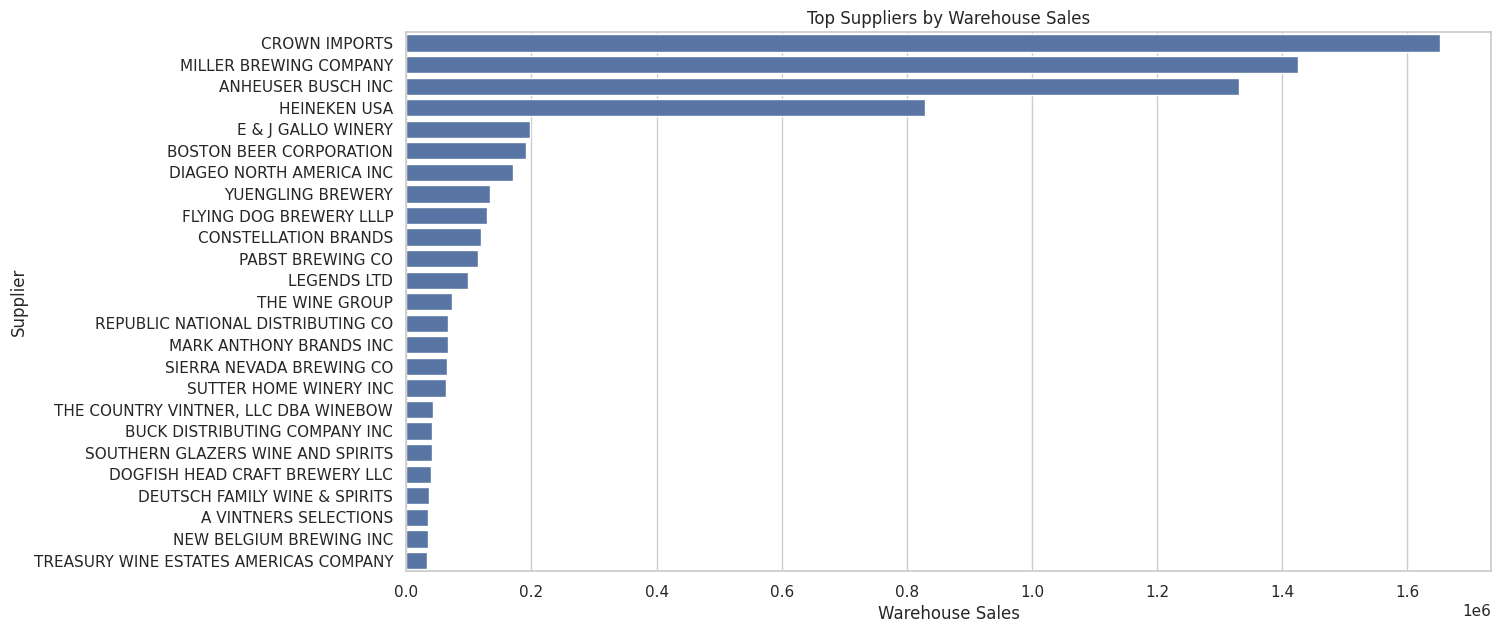

In [52]:
supplier_sales = data.groupby('SUPPLIER')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].sum().reset_index()
top_suppliers = supplier_sales.nlargest(25, 'RETAIL SALES')


plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL SALES', y='SUPPLIER', data=top_suppliers)
plt.title('Top Suppliers by Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Supplier')
plt.show()

top_suppliers = supplier_sales.nlargest(25, 'RETAIL TRANSFERS')

plt.figure(figsize=(14, 7))
sns.barplot(x='RETAIL TRANSFERS', y='SUPPLIER', data=top_suppliers)
plt.title('Top Suppliers by Retail Transfers')
plt.xlabel('Retail Transfers')
plt.ylabel('Supplier')
plt.show()

top_suppliers = supplier_sales.nlargest(25, 'WAREHOUSE SALES')

plt.figure(figsize=(14, 7))
sns.barplot(x='WAREHOUSE SALES', y='SUPPLIER', data=top_suppliers)
plt.title('Top Suppliers by Warehouse Sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Supplier')
plt.show()

5:MONTH SALES

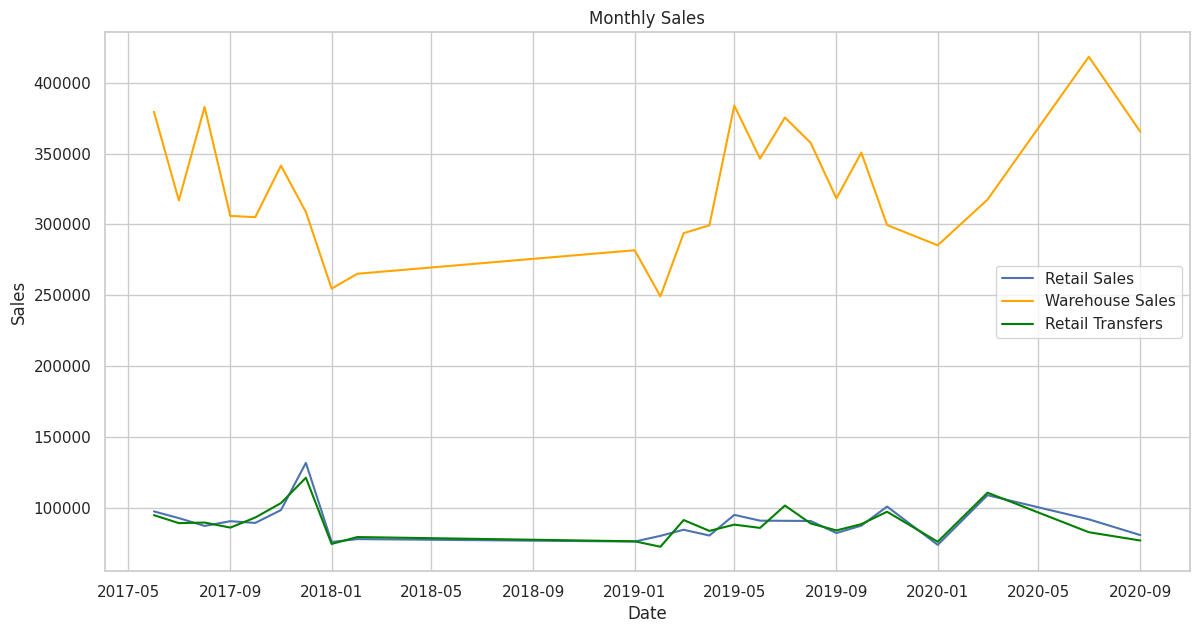

In [49]:
monthly_sales = data.groupby(['YEAR', 'MONTH'])[['RETAIL SALES','RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['DATE'], monthly_sales['RETAIL SALES'], label='Retail Sales')
plt.plot(monthly_sales['DATE'], monthly_sales['WAREHOUSE SALES'], label='Warehouse Sales', color='orange')
plt.plot(monthly_sales['DATE'], monthly_sales['RETAIL TRANSFERS'], label='Retail Transfers', color='green')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

SCATTERPLOTS B/W NUMERIC FEATURES

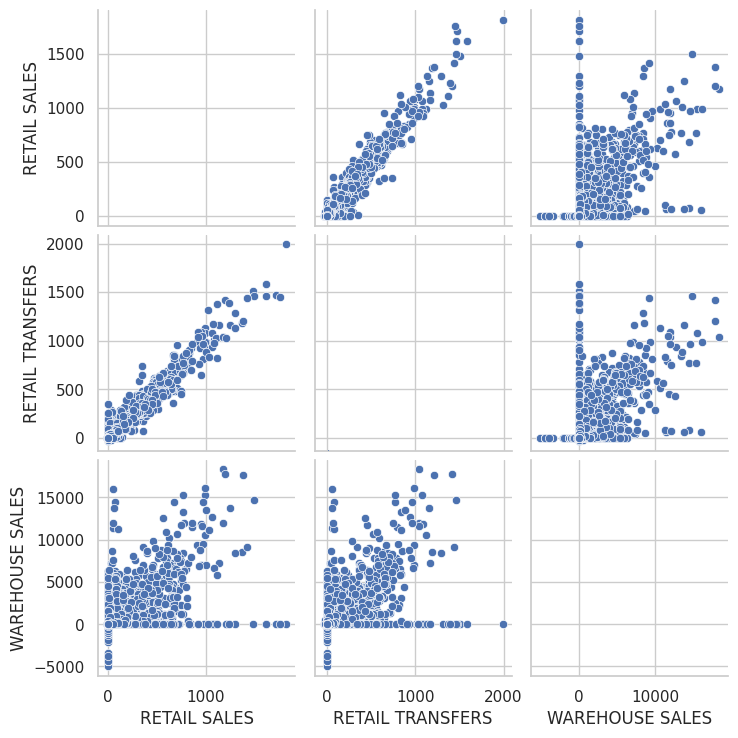

In [51]:
# Plot a pairplot to visualize relationships between numeric features
sns.pairplot(data[['RETAIL SALES','RETAIL TRANSFERS', 'WAREHOUSE SALES']])
plt.show()

# STEP6:Finding the Optimal Number of Clusters (K)

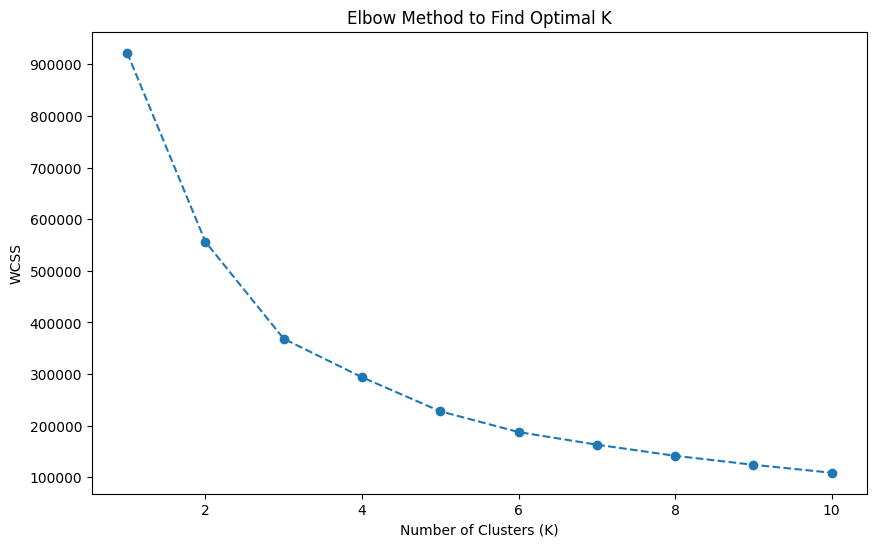

In [ ]:
# Using the Elbow Method to find the optimal number of clusters (K)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()

# STEP7:KMEANS CLUSTERING AND SILHOUTTE SCORE ANALYSIS

In [72]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
product_sales['Cluster_KMeans'] = kmeans.fit_predict(product_sales_scaled)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [68]:
#Evaluation
kmeans_silhouette = silhouette_score(product_sales_scaled, product_sales['Cluster_KMeans'])
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

Silhouette Score for K-Means: 0.9691052218217864


# STEP7:KMEANS CLUSTERING VIZUALIZATION

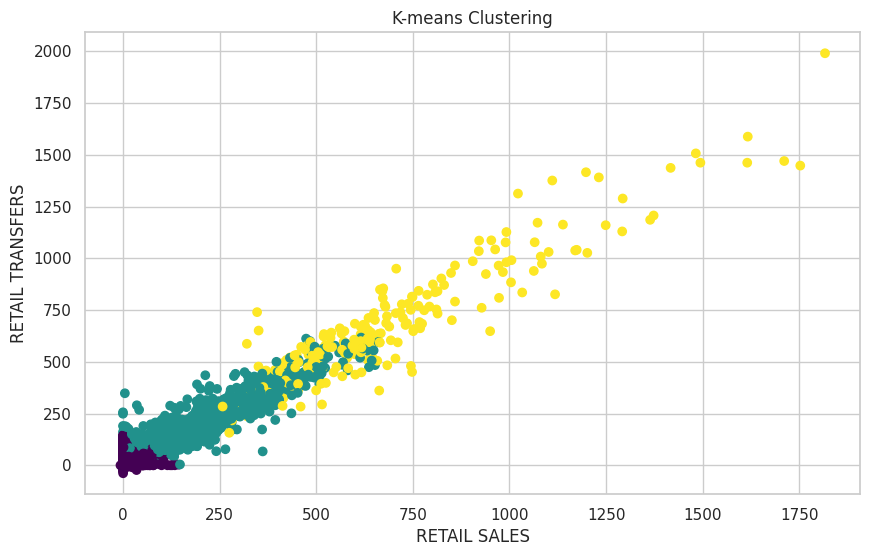

In [69]:
# Based on the Elbow Method, choose the optimal number of clusters (K)

# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['RETAIL SALES'], data['RETAIL TRANSFERS'], c=data['Cluster'], cmap='viridis')
plt.xlabel('RETAIL SALES')
plt.ylabel('RETAIL TRANSFERS')
plt.title('K-means Clustering')
plt.show()

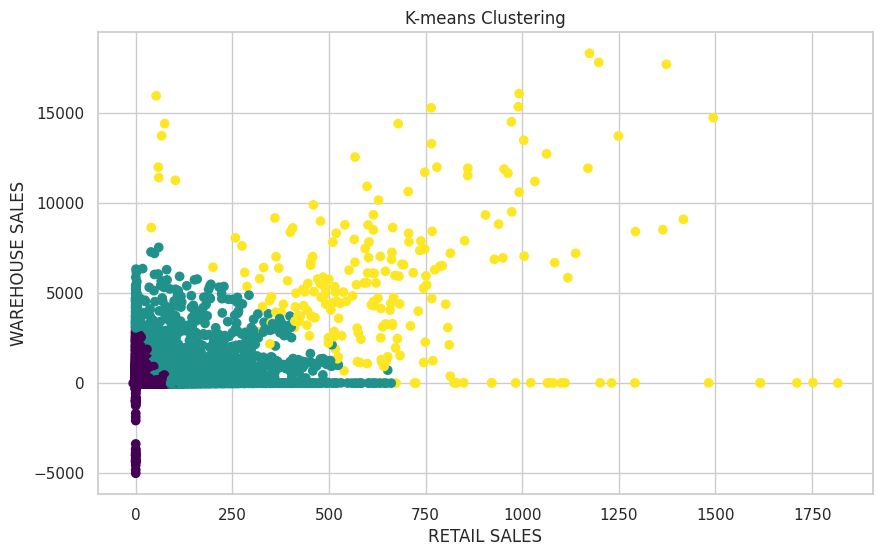

In [70]:
# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['RETAIL SALES'], data['WAREHOUSE SALES'], c=data['Cluster'], cmap='viridis')
plt.xlabel('RETAIL SALES')
plt.ylabel('WAREHOUSE SALES')
plt.title('K-means Clustering')
plt.show()

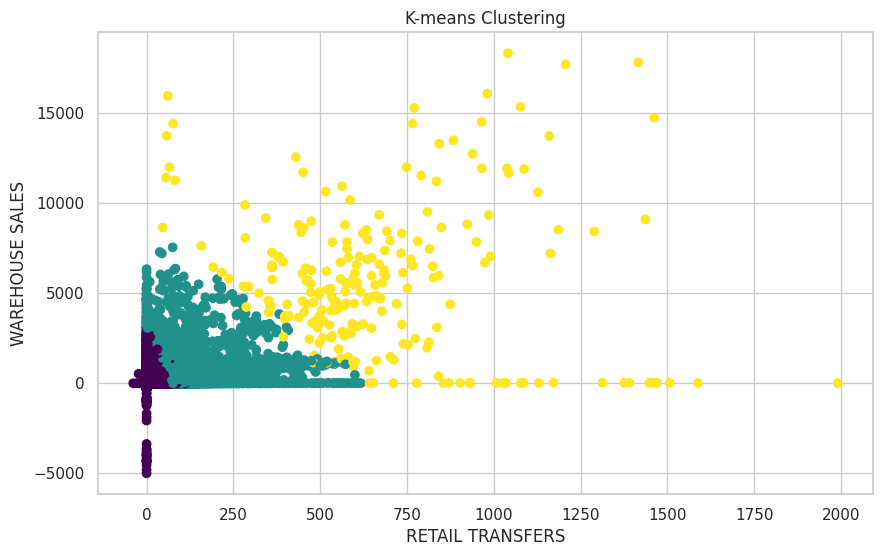

In [71]:
# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['RETAIL TRANSFERS'], data['WAREHOUSE SALES'], c=data['Cluster'], cmap='viridis')
plt.xlabel('RETAIL TRANSFERS')
plt.ylabel('WAREHOUSE SALES')
plt.title('K-means Clustering')
plt.show()